# 1. 트랜스포머 Transformer

트랜스포머는 2017년 구글이 발표한 논문인 "Attention is all you need"에서 나온 모델로 기존의 seq2seq 구조인 인코더-디코더를 따르면서도, 논문의 이름처럼 어텐션만으로 구현한 모델이다. 이 모델은 RNN을 사용하지 않고, 인코더-디코더 구조를 설계하였음에도 성능이 RNN보다 우수하다는 특징이 있다. 



 ## 1.1 기존 seq2seq 모델의 한계

seq2seq모델은 인코더-디코더 구조로 구성되어있다. **인코더는 입력 시퀀스를 하나의 벡터 표현으로 압축하고, 디코더는 이 벡터 표현을 통해서 출력 시퀀스를 만들어냈다.** 이러한 구조는 인코더가 입력 시퀀스를 하나의 벡터로 압축하는 과정에서 정보가 일부 손실된다는 단점이 있었고, 이를 보정하기 위해 어텐션이 사용되었다. 그런데 어텐션을 RNN의 보정을 위한 용도가 아니라 아예 어텐션으로 인코더와 디코더를 만들어보면 어떨까?

 ## 1.2 트랜스포머의 주요 하이퍼파라미터

여기서는 트랜스포머에 이러한 하이퍼파라미터가 존재한다 정도만 이해하자. 

- Dmodel = 트랜스포머의 인코더와 디코더에서의 정해진 입력과 출력의 크기. 즉, 임베딩 벡터의 크기 또한 이것이며, 각 인코더와 디코더가 다음 층의 인코더와 디코더로 값을 보낼 때에도 이 크기를 가진다. 
- num_layers = 트랜스포머에서 하나의 인코더와 디코더를 층으로 생각했을 때, 모델이 인코더와 디코더가 총 명 층으로 구성되었는지를 의미.
- num_heads = 트랜스포머에서는 어텐션을 사용할 때, 1번 하는 것보다 여러 개로 분할해서 병렬로 어텐션을 수행하고 결과값을 다시 하나로 합치는 방식을 택했다. 이때 이 병렬의 개수를 의미
- Dff = 트랜스포머 내부에는 피드 포워드 신경망이 존재한다. 이때 은닉층의 크기를 의미. 피드 포워드 신경망의 입력층과 출력층 크기는 Dmodel의 크기를 가진다. 

## 1.3 트랜스포머

**이전 seq2seq구조에서는 인코더와 디코더에서 각각 하나의 RNN이 t개의 시점을 가지는 구조였다면 이번에는 인코더와 디코더라는 단위가 N개로 구성되는 구조이다.** 다음 그림은 인코더와 디코더가 6개씩 존재하는 구조이다. 
<img src="./image/트랜스포머.jpg" width="300" height="150">

## 1.4 포지셔널 인코딩

트랜스포머의 내부를 이해하기 전에 트랜스포머의 입력에 대해 알아보자. 

트랜스포머의 인코더와 디코더는 단순히 각 단어의 임베딩 벡터들을 입력받는것이 아니라 임베딩 벡터에서 조정된 값을 입력받는다.트랜스포머는 단어 입력을 순차적으로 받는 방식이 아니므로 단어의 위치 정보를 다른 방식으로 알려줄 필요가 있다. **트랜스포머는 단어의 위치 정보를 얻기 위해 각 단어의 임베딩 벡터에 위치 정보들을 더하여 모델의 입력으로 사용하는데, 이를 포지셔널 인코딩이라고 한다.** 

<img src="./image/포지셔널인코딩.jpg" width="500" height="200">

위의 그림은 입력으로 사용되는 임베딩 벡터들이 트랜스포머의 입력으로 사용되기 전에 포지셔널 인코딩값이 더해지는 것을 보여준다. 

<img src="./image/포지셔널인코딩2.jpg" width="500" height="200">

<img src="./image/포지셔널인코딩3.jpg" width="400" height="200">

위에서 본 임베딩 벡터와 포지셔널 인코딩의 덧셈은 사실 임베딩 벡터가 모여 만들어진 문장 벡터와 행렬과 포지셔널 인코딩 행렬의 덧셈 연산을 통해 이루어진다는 점은 이해하자.

이처럼 트랜스포머는 위치 정보를 가진 값을 만들기 위해서 아래의 두 함수를 사용한다. 트랜스포머는 사인함수와 코사인 함수의 값을 임베딩 벡터에 더해주므로서 단어의 순서 정보를 더해준다. pos는 임베딩 벡터의 위치를 나타내며, i는 임베딩 벡터 내의 차원 인덱스를 의미한다. 아래 함수를 보면 (pos, 2i)일 때는 사인함수를 사용하고 (pos, 2i+1)일 때는 코사인 함수를 사용한다. 

<img src="./image/포지셔널인코딩함수.jpg" width="300" height="200">

각 임베딩 벡터에 포지셔널 인코딩값을 더하면 같은 단어라고 하더라도 문장 내의 위치에 따라서 트랜스포머의 입력으로 들어가는 임베딩 벡터의 값이 달라진다. **결국 트랜스포머의 입력은 순서 정보가 고려된 임베딩 벡터이다** 

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [4]:
class PositionalEncoding(tf.keras.layers.Layer):
    def __init__(self, position, d_model):
        super(PositionalEncoding, self).__init__()
        self.pos_encoding = self.positional_encoding(position, d_model)

    def get_angles(self, position, i, d_model):
        angles = 1 / tf.pow(10000, (2 * (i // 2)) / tf.cast(d_model, tf.float32))
        return position * angles

    def positional_encoding(self, position, d_model):
        angle_rads = self.get_angles(
        position=tf.range(position, dtype=tf.float32)[:, tf.newaxis],
        i=tf.range(d_model, dtype=tf.float32)[tf.newaxis, :],
        d_model=d_model)

        # 배열의 짝수 인덱스(2i)에는 사인 함수 적용
        sines = tf.math.sin(angle_rads[:, 0::2])

        # 배열의 홀수 인덱스(2i+1)에는 코사인 함수 적용
        cosines = tf.math.cos(angle_rads[:, 1::2])

        angle_rads = np.zeros(angle_rads.shape)
        angle_rads[:, 0::2] = sines
        angle_rads[:, 1::2] = cosines
        pos_encoding = tf.constant(angle_rads)
        pos_encoding = pos_encoding[tf.newaxis, ...]

        print(pos_encoding.shape)
        return tf.cast(pos_encoding, tf.float32)

    def call(self, inputs):
        return inputs + self.pos_encoding[:, :tf.shape(inputs)[1], :]

(1, 50, 128)


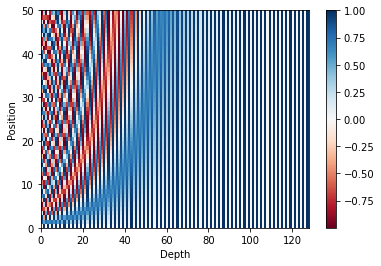

In [5]:
# 문장의 길이 50, 임베딩 벡터의 차원 128 크기를 가지는 포지셔널 인코딩 행렬을 시각화해보자. 
sample_pos_encoding = PositionalEncoding(50, 128)

plt.pcolormesh(sample_pos_encoding.pos_encoding.numpy()[0], cmap='RdBu')
plt.xlabel('Depth')
plt.xlim((0, 128))
plt.ylabel('Position')
plt.colorbar()
plt.show()

In [11]:
sample_pos_encoding.pos_encoding.numpy()[0]

array([[ 0.00000000e+00,  1.00000000e+00,  0.00000000e+00, ...,
         1.00000000e+00,  0.00000000e+00,  1.00000000e+00],
       [ 8.41470957e-01,  5.40302277e-01,  7.61720419e-01, ...,
         1.00000000e+00,  1.15478193e-04,  1.00000000e+00],
       [ 9.09297407e-01, -4.16146815e-01,  9.87046242e-01, ...,
         9.99999940e-01,  2.30956386e-04,  1.00000000e+00],
       ...,
       [ 1.23573124e-01, -9.92335498e-01,  1.39918879e-01, ...,
         9.99980330e-01,  5.42744854e-03,  9.99985278e-01],
       [-7.68254697e-01, -6.40144348e-01, -6.63572073e-01, ...,
         9.99979496e-01,  5.54292509e-03,  9.99984622e-01],
       [-9.53752637e-01,  3.00592542e-01, -9.99784648e-01, ...,
         9.99978662e-01,  5.65840118e-03,  9.99983966e-01]], dtype=float32)

In [13]:
print(len(sample_pos_encoding.pos_encoding.numpy()[0]))
print(len(sample_pos_encoding.pos_encoding.numpy()[0][0]))

50
128


## 1.5 어텐션

트랜스포머에서 사용되는 세 가지의 어텐션에 대해서 간단히 정리해보자. 

<img src="./image/트랜스포머어텐션.jpg" width="250" height="200">

첫번째 그림인 셀프 어텐션은 인코더에서 이루어지지만, 두번째와 세번째 어텐션은 디코더에서 이루어진다. **셀프 어텐션은 본질적으로 Query, keyk value가 동일한 경우를 말한다.** 반면 세번째 그림 인코더-디코더 어텐션은 Query가 디코더의 벡터인 반면, key와 value가 인코더의 벡터이므로 셀프 어텐션이라고 부르지 않는다. **주의할 점은 여기서 Query, key등이 같다는 것은 벡터의 값이 같다는 것이 아니라 벡터의 출처가 같다는 의미이다.**

<img src="./image/트랜스포머어텐션종류.jpg" width="500" height="300">

위 그림은 트랜스포머의 아키텍쳐에서 세 가지 어텐션이 각각 어디에서 이루어지는지를 보여준다. 

## 1.6 인코더

인코더 구조에 대해서 알아보자. 
트랜스포머는 하이퍼파라미터인 num_layers개수의 인코더 층을 쌓는다. 인코더를 하나의 층으로 생각하며, 하나의 인코더 층은 크게 총 2개의 서브층으로 나뉘어진다. **셀프 어텐션과 피드 포워드 신경망이다.** 아래의 그림에서 멀티 헤드 셀프 어텐션은 셀프 어텐션을 병렬적으로 사용했다는 의미고, 포지션 와이즈 피드 포워드 신경망은 일반적인 피드 포워드 신경망이다. 

<img src="./image/트랜스포머인코더.jpg" width="300" height="250">

<br><br>
# 2. 인코더의 셀프 어텐션

셀프 어텐션이 앞서 배웠던 어텐션과 무엇이 다른지 이해하보자.



## 2.1 셀프 어텐션의 의미와 이점

**<앞서 배운 어텐션>**

<img src="./image/기존어텐션.jpg" width="300" height="250">

어텐션 함수는 주어진 Query에 대해서 모든 Key와의 유사도를 각각 구한다. 그리고 이 유사도를 가중치로 하여 키와 매핑되어있는 각각의 값에 반영된 값value를 반영해준다. 이 유사도가 반영된 값value를 모두 가중합하여 리턴한다. 

- Q = Query : t 시점의 디코더 셀에서의 은닉 상태
- K = Keys : 모든 시점의 인코더 셀의 은닉 상태들
- V = Values : 모든 시점의 인코더 셀의 은닉 상태들

그런데 t시점이라는 것은 계속 변화하면서 반복적으로 쿼리를 수행하므로 결국 전체 시점에 대해서 일반화를 할 수 있다. 

- Q = Query : 모든 시점의 디코더 셀에서의 은닉 상태
- K = Keys : 모든 시점의 인코더 셀의 은닉 상태들
- V = Values : 모든 시점의 인코더 셀의 은닉 상태들

**<셀프 어텐션>**

이처럼 기존에는 디코더 셀의 은닉 상태가 Q이고 인코더 셀의 은닉 상태가 K라는 점에서 Q와 K가 다른 값을 가지고 있다. 그런데 셀프 어텐션에서는 Q,K,V가 전부 동일하다. 

- Q = Query : 입력 문장의 모든 단어 벡터들
- K = Keys : 입력 문장의 모든 단어 벡터들
- V = Values : 입력 문장의 모든 단어 벡터들

**<셀프 어텐션 효과>**

**왜 입력 문장 안에서도 어텐션이 필요할까?!**

<img src="./image/셀프어텐션예제.jpg" width="300" height="250">

위의 입력 문장에서 it은 animal을 의미하는 것을 우리는 쉽게 알 수 있지만 기계는 animal인지 street을 의미하는지 알 수 없다. 하지만 셀프 어텐션은 입력 문장 내의 단어들끼리 유사도를 구하므로서 it이 animal과 연관되었을 확률이 높다는 것을 찾아내는 것이다.

## 2.2 Q,K,V 벡터 얻기

**셀프 어텐션은 각 단어 벡터들로부터 Q벡터, K벡터, V벡터를 얻는 작업을 거친다.** 이 벡터들은 초기 입력인 Dmodel보다 작은 차원을 가지는데, 논문에서는 512차원을 가졌던 단어 벡터들을 64차원을 가지는 Q,K,V벡터로 변환하였다.  트랜스포머는 Dmodel을 num_heads로 나눈 값을 Q,K,V벡터의 차원으로 결정한다. 아래는 student단어벡터를 Q,K,V벡터로 변환하는 과정을 보여준다. 

<img src="./image/셀프어텐션예제2.jpg" width="300" height="250">

## 2.3 스케일 닷-프로덕트 어텐션

Q,K,V 벡터를 얻었다면 지금부터는 기존에 배운 어텐션 메커니즘과 동일하다. 각 Q벡터는 모든 k벡터에 대해서 어텐션 스코어를 구하고, 어텐션 분포를 구한 뒤에 이를 사용하여 모든 V벡터를 가중합하여 어텐션 값 또는 컨텍스트 벡터를 구하게 된다. 

트랜스포머에서는 내적만을 사용하는 어텐션 함수가 아니라 여기에 특정값으로 나눠준 어텐션 함수인 <img src="./image/어텐션함수2.png" width="150" height="100"> 을 사용한다. 이러한 함수는 사용하는 어텐션을 **스케일드 닷-프로덕트 어텐션**이라고 한다. 

<img src="./image/스케일닷프로덕트어텐션.jpg" width="500" height="250">

<우선 I에 대한 Q벡터를 기준으로 설명해보자.> 

1. 단어 I에 대한 Q벡터가 모든 K벡터에 대해서 어텐션 스코어를 구한다.(16,4,4,16에 해당)
2. 어텐션 스코어는 각각 단어 I가 I,am,a,student와 얼마나 연관되어 있는지는 보여준다 
3. 어텐션 스코어를 구할 때 두 벡터의 내적값을 스케일링 하는 값으로 k벡터의 차원에 루트를 씌운 값을 택한다. 
4. 어텐션 스코어에 소프트맥스 함수를 사용해서 어텐션 분포를 구한다.
5. 어텐션 분포에 각 V벡터와 가중합하여 어텐션 값을 구한다. 
6. 이를 단어 I에 대한 어텐션 값 또는 단어 I에 대한 컨텍스트 벡터라고 부른다. 

## 2.4 행렬 연산으로 일괄 처리

지금까지 벡터 연산으로 설명한 이유는 이해를 위해서이고 실제로는 행렬 연산으로 구현된다. 

1. 문장 행렬에 가중치 행렬을 곱해서 Q행렬, K행렬, V행렬을 구한다.

<img src="./image/행렬연산1.jpg" width="350" height="250">

2. Q행렬을 K행렬을 전치한 행렬과 곱해서 어텐션 스코어행렬을 구한다.아래 그림에서 행렬값에 전체적으로 스케일값을 나우어주면 각 행렬과 열이 어텐션 스코어 값을 가지는 행렬이 된다. 

<img src="./image/행렬연산2.jpg" width="500" height="250">

3. 어텐션 분포를 구하고 이를 사용하여 모든 단어에 대한 어텐션 값을 구한다. 

<img src="./image/행렬연산3.jpg" width="500" height="250">
<img src="./image/행렬연산수식.jpg" width="500" height="250">

## 2.5 스케일드 닷-프로덕트 어텐션 구현 

In [14]:
def scaled_dot_product_attention(query, key, value, mask):
  # query 크기 : (batch_size, num_heads, query의 문장 길이, d_model/num_heads)
  # key 크기 : (batch_size, num_heads, key의 문장 길이, d_model/num_heads)
  # value 크기 : (batch_size, num_heads, value의 문장 길이, d_model/num_heads)
  # padding_mask : (batch_size, 1, 1, key의 문장 길이)

  # Q와 K의 곱. 어텐션 스코어 행렬.
  matmul_qk = tf.matmul(query, key, transpose_b=True)

  # 스케일링
  # dk의 루트값으로 나눠준다.
  depth = tf.cast(tf.shape(key)[-1], tf.float32)
  logits = matmul_qk / tf.math.sqrt(depth)

  # 마스킹. 어텐션 스코어 행렬의 마스킹 할 위치에 매우 작은 음수값을 넣는다.
  # 매우 작은 값이므로 소프트맥스 함수를 지나면 행렬의 해당 위치의 값은 0이 된다.
  if mask is not None:
    logits += (mask * -1e9)

  # 소프트맥스 함수는 마지막 차원인 key의 문장 길이 방향으로 수행된다.
  # attention weight : (batch_size, num_heads, query의 문장 길이, key의 문장 길이)
  attention_weights = tf.nn.softmax(logits, axis=-1)

  # output : (batch_size, num_heads, query의 문장 길이, d_model/num_heads)
  output = tf.matmul(attention_weights, value)

  return output, attention_weights

In [15]:
# 임의의 Query, Key, Value인 Q, K, V 행렬 생성
np.set_printoptions(suppress=True)
temp_k = tf.constant([[10,0,0],
                      [0,10,0],
                      [0,0,10],
                      [0,0,10]], dtype=tf.float32)  # (4, 3)

temp_v = tf.constant([[   1,0],
                      [  10,0],
                      [ 100,5],
                      [1000,6]], dtype=tf.float32)  # (4, 2)
temp_q = tf.constant([[0, 10, 0]], dtype=tf.float32)  # (1, 3)

In [16]:
temp_out, temp_attn = scaled_dot_product_attention(temp_q, temp_k, temp_v, None)
print(temp_attn) # 어텐션 분포(어텐션 가중치의 나열)
print(temp_out) # 어텐션 값

tf.Tensor([[0. 1. 0. 0.]], shape=(1, 4), dtype=float32)
tf.Tensor([[10.  0.]], shape=(1, 2), dtype=float32)


Query에 해당하는 temp_q가 K의 두번째 값과 일치하므로 어텐션 분포를 보면 두번째 가중치가 1이 나온걸을 확인할 수 있다. 결과적으로 value의 두번째 값인 [10,0]이 출력된다. 

In [17]:
temp_q = tf.constant([[0, 0, 10]], dtype=tf.float32)
temp_out, temp_attn = scaled_dot_product_attention(temp_q, temp_k, temp_v, None)
print(temp_attn) # 어텐션 분포(어텐션 가중치의 나열)
print(temp_out) # 어텐션 값

tf.Tensor([[0.  0.  0.5 0.5]], shape=(1, 4), dtype=float32)
tf.Tensor([[550.    5.5]], shape=(1, 2), dtype=float32)


[0,0,10]은 key의 세번째와 네번째 값과 모두 일치한다. 결과적으로 나오는 값 [550, 5.5]는 value의 세번째 값 [100,5]에 0.5을 곱한 값과 네번째 값 [1000,6]에 0.5를 곱한 값의 원소별 합이다. 

## 2.6 멀티 헤드 어텐션

**앞서 어텐션에서는 Dmodel의 차원을 가진 단어 벡터를 unm_heads로 나눈 차원을 가지는 Q,K,V벡터로 바꾸고 어텐션을 수행하였다.** 논문 기준으로 512차원의 각 단어 벡터를 8로 나누어 64월의 Q,K,V벡터로 바꾸어서 어텐션을 수행하였다. 그럼 num_heads의 의미와 왜 Dmodel 차원으로 어텐션을 하지 않고 차원을 축소시킨 벡터로 수행하는지 이해해보자. 

<img src="./image/멀티헤드어텐션.jpg" width="500" height="250">

트랜스포머 연구진은 한 번의 어텐션을 하는 것보다 여러번의 어텐션을 병렬로 사용하는 것이 더 효과적이라고 판단했다. **Dmodel / num_heads차원을 가지는 Q,K,V에 대해서 num_heads개의 병렬 어텐션을 수행한다.** 이때 각각의 어텐션 값 행렬을 어텐션 헤드라고 부른다. 이때 가중치 행렬 Wq, Wk, Wv의 값은 8개의 어텐션 헤드마다 전부 다르다. **어텐션을 병렬로 수행하면 다른 시각으로 정보들을 수집할 수 있다.**

 병렬 어텐션을 모두 수행하였다면 모든 어테션 헤드를 연결한다. 모두 연결된 어텐션 헤드 행렬의 크기는 (seq_len, Dmodel)가 된다.  
 

어텐션 헤드를 모두 연결한 행렬은 또 다른 가중치 행렬 W0을 곱하게 되는데 이렇게 나온 결과 행렬이 멀티 헤드 어텐션의 최종 결과물이다. 이때 결과물인 멀티-헤드 어텐션 행렬은 인코더의 입력이었던 문장 행렬의 (seq_len, dmodel) 크기와 동일하다. **즉, 인코더의 첫번째 서브층인 멀티-헤드 어텐션 단계를 끝마쳤을때, 인코더의 입력으로 들어왔던 행렬의 크기가 아직 유지되고 있다!!** 트랜스포머는 다수의 인코더를 쌓은 형태인데, 인코더에서의 입력의 크기가 출력에서도 동일 크기로 유지되어야만 다음 인코더에서도 다시 입력이 될 수 있기 때문이다. 

## 2.7 멀티 헤드 어텐션 구현하기

멀티 헤드 어텐션에서는 크게 두 종류의 가중치 행렬이 있다. 
1. Q,K,V행렬을 만들기 위한 가중치 행렬
2. 어텐션 헤드들을 연결후에 곱해주는 가중치

멀티헤드 어텐션의 구현은 다섯가지 파트로 구성된다. 이때 가중치 행렬을 곱하는 것을 구현 상에서는 입력을 밀집층Dense layer를 지나게 하므로서 구현한다.
1. WQ, WK, WV에 해당하는 d_model 크기의 밀집층(Dense layer)을 지나게한다.
2. 지정된 헤드 수(num_heads)만큼 나눈다(split).
3. 스케일드 닷 프로덕트 어텐션.
4. 나눠졌던 헤드들을 연결(concatenatetion)한다.
5. WO에 해당하는 밀집층을 지나게 한다.

In [19]:
class MultiHeadAttention(tf.keras.layers.Layer):

  def __init__(self, d_model, num_heads, name="multi_head_attention"):
    super(MultiHeadAttention, self).__init__(name=name)
    self.num_heads = num_heads
    self.d_model = d_model

    assert d_model % self.num_heads == 0

    # d_model을 num_heads로 나눈 값.
    # 논문 기준 : 64
    self.depth = d_model // self.num_heads

    # WQ, WK, WV에 해당하는 밀집층 정의
    self.query_dense = tf.keras.layers.Dense(units=d_model)
    self.key_dense = tf.keras.layers.Dense(units=d_model)
    self.value_dense = tf.keras.layers.Dense(units=d_model)

    # WO에 해당하는 밀집층 정의
    self.dense = tf.keras.layers.Dense(units=d_model)

  # num_heads 개수만큼 q, k, v를 split하는 함수
  def split_heads(self, inputs, batch_size):
    inputs = tf.reshape(
        inputs, shape=(batch_size, -1, self.num_heads, self.depth))
    return tf.transpose(inputs, perm=[0, 2, 1, 3])

  def call(self, inputs):
    query, key, value, mask = inputs['query'], inputs['key'], inputs[
        'value'], inputs['mask']
    batch_size = tf.shape(query)[0]

    # 1. WQ, WK, WV에 해당하는 밀집층 지나기
    # q : (batch_size, query의 문장 길이, d_model)
    # k : (batch_size, key의 문장 길이, d_model)
    # v : (batch_size, value의 문장 길이, d_model)
    # 참고) 인코더(k, v)-디코더(q) 어텐션에서는 query 길이와 key, value의 길이는 다를 수 있다.
    query = self.query_dense(query)
    key = self.key_dense(key)
    value = self.value_dense(value)

    # 2. 헤드 나누기
    # q : (batch_size, num_heads, query의 문장 길이, d_model/num_heads)
    # k : (batch_size, num_heads, key의 문장 길이, d_model/num_heads)
    # v : (batch_size, num_heads, value의 문장 길이, d_model/num_heads)
    query = self.split_heads(query, batch_size)
    key = self.split_heads(key, batch_size)
    value = self.split_heads(value, batch_size)

    # 3. 스케일드 닷 프로덕트 어텐션. 앞서 구현한 함수 사용.
    # (batch_size, num_heads, query의 문장 길이, d_model/num_heads)
    scaled_attention, _ = scaled_dot_product_attention(query, key, value, mask)
    # (batch_size, query의 문장 길이, num_heads, d_model/num_heads)
    scaled_attention = tf.transpose(scaled_attention, perm=[0, 2, 1, 3])

    # 4. 헤드 연결(concatenate)하기
    # (batch_size, query의 문장 길이, d_model)
    concat_attention = tf.reshape(scaled_attention,
                                  (batch_size, -1, self.d_model))

    # 5. WO에 해당하는 밀집층 지나기
    # (batch_size, query의 문장 길이, d_model)
    outputs = self.dense(concat_attention)

    return outputs

## 2.8 패딩 마스크

앞에서 구현한 스케일드 닷 프로덕트 어텐션 함수 내부에 

마스킹. 어텐션 스코어 행렬의 마스킹 할 위치에 매우 작은 음수값을 넣는다.
매우 작은 값이므로 소프트맥스 함수를 지나면 행렬의 해당 위치의 값은 0이 된다.

if mask is not None :
logits += (mask * -1e9)

mask라는 값을 받아서 mask값에다가 아주 작은 음수값을 곱한 후 어텐션 스코어 행렬에 더해준다. 이는 입력 문장에 PAD토큰이 있을 경우 어텐션에서 사실상 제외하기 위한 연산이다.

<img src="./image/패딩마스크.jpg" width="500" height="250">

사실 단어 pad 경우에 실질적인 의미를 가진 단어가 아니다 그래서 **트랜스포머에서는 key의 경우에 pad토큰이 존재하면 이에 대해 유사도를 구하지 않도록 마스킹을 해주는 것이다.**  

<img src="./image/패딩마스크2.jpg" width="400" height="200">

어텐션 스코어 행렬에서 행에 해당하는 문장은 Q이고, 열에 해당하는 문장은 K이다. 그리고 K에 pad가 있는 경우에는 해당 열 전체를 마스킹 해준다. 현재 매스킹 위치에 매우 작은 음수 값이 들어가 있으므로 어텐션 스코어 행렬이 소프트맥스 함수를 지난 후에는 0에 굉장히 가까운 값이 되어 pad 토큰이 반영되지 않게된다. 

<br><br>
# 3. 포지션-와이즈 피드 포워드 신경망 Position-wise FFNN

포지션 와이즈 FFNN은 인코더와 디코더에서 공통적으로 가지고 있는 서브층이다. 쉽게 말하면 완전 연결이라고 해석할 수 있다. 

<img src="./image/포지션와이즈.jpg" width="300" height="200">

이 식에서 x는 멀티 헤드 어텐션의 결과로 나온 (seq_len, Dmodel)크기를 가지는 행렬이다. 가중치 행렬W1는 (Dmodel, Dff) 크기이고, 가중치 행렬 W2는 (Dff, Dmodel)의 크기를 가진다. 이 식에 매개변수들은 하나의 인코더 층 내에서는 다른 문장, 다른 단어들마다 정확하게 동일하지만 인코더 층마다는 다른 값을 가진다. 

<img src="./image/포지션와이즈2.jpg" width="500" height="300">

인코더의 입력을 벡터 단위로 봤을때, 각 벡터들이 멀티 헤드 어텐션 층이라는 인코더의 첫번째 서브 층을 지나 두번째 서브층인 FFNN을 지나는 것을 보여준다. 실제로는 우측과 같이 행렬로 연산되는데, **두번째 서브층을 지난 인코더의 최종 출력은 여전히 인코더의 입력 크기였던 (seq_len, Dmodel)크기가 보존되고 있다. 하나의 인코더 층을 지난 이 행렬은 다음 인코더 층으로 전달되고, 다음 층에서도 동일한 인코더 연산이 반복된다.**

In [ ]:
# 이를 구현하면 
outputs = tf.keras.layers.Dense(units=dff, activation='relu')(attention)
outputs = tf.keras.layers.Dense(units=d_model)(outputs)

<br><br>
# 4. 잔차 연결과 층 정규화

트랜스포머에서는 이러함 두 개의 서브층을 가진 인코더에 추가적으로 사용하는 기법이 있는데, 바로 Add & Norm이다. residual connection 과 layer normalization이다.

## 4.1 잔차 연결 residual connection

<img src="./image/잔차연결.jpg" width="500" height="300">

**잔차 연결은 서브층의 입력과 출력을 더하는 것을 말한다.** 서브층의 입력과 출력은 동일한 차원을 갖고 있으므로, 입력과 출력은 덧셈 연산을 할 수 있다. 위의 그림에서 각 화살표가 서브층의 입력에서 출력으로 향하도록 그려진 이유이다. 잔차 연결은 컴퓨터 비전 분야에서 주로 사용되는 모델의 학습은 돕는 기법이다. 

서브층이 멀티 헤드 어텐션이라면 잔차 연결 연산은 다음과 같다. 

<img src="./image/잔차연결2.jpg" width="500" height="300">

<br>

## 4.2 층 정규화 Layer Normalization

**층 정규화는 텐서의 마지막 차원에 대해서 평균과 분산을 구하고, 이를 가지고 어떤 수식을 통해 값을 정규화하여 학습을 돕는다.** 

<img src="./image/층정규화.jpg" width="200" height="150">

층 정규화를 위해서 화살표 방향으로 각각 평균과 분산을 구한다. 이제 층 정규화의 수식을 알아보면 두 과정으로 나누어 설명한다. 

1. 평균과 분산을 통한 정규화 - 각 행을 평균과 분산을 통해 정규화 해준다. 
2. 감마와 베타를 도입하는것

# 5. 인코더 구현하기!!!

인코더는 총 두 개의 서브층으로 이루어지는데, 각 서브층 이후에는 드롭아웃, 잔차 연결과 층 정규화가 수행된다. 이 코드는 하나의 인코더 블록, 하나의 인코더 층을 구현하는 코드이다. 실제로 트랜스포머는 num_layers 개수만큼의 인코더 층을 사용하므로 이를 여러번 쌓는 코드를 별도로 구현해야한다. 

In [20]:
def encoder_layer(dff, d_model, num_heads, dropout, name="encoder_layer"):
  inputs = tf.keras.Input(shape=(None, d_model), name="inputs")

  # 인코더는 패딩 마스크 사용
  # 어텐션 시 패딩 토큰을 제외하도록
  padding_mask = tf.keras.Input(shape=(1, 1, None), name="padding_mask")

  # 멀티-헤드 어텐션 (첫번째 서브층 / 셀프 어텐션)
  attention = MultiHeadAttention(
      d_model, num_heads, name="attention")({
          'query': inputs, 'key': inputs, 'value': inputs, # Q = K = V
          'mask': padding_mask # 패딩 마스크 사용
      })

  # 드롭아웃 + 잔차 연결과 층 정규화
  attention = tf.keras.layers.Dropout(rate=dropout)(attention)
  attention = tf.keras.layers.LayerNormalization(
      epsilon=1e-6)(inputs + attention)

  # 포지션 와이즈 피드 포워드 신경망 (두번째 서브층)
  outputs = tf.keras.layers.Dense(units=dff, activation='relu')(attention)
  outputs = tf.keras.layers.Dense(units=d_model)(outputs)

  # 드롭아웃 + 잔차 연결과 층 정규화
  outputs = tf.keras.layers.Dropout(rate=dropout)(outputs)
  outputs = tf.keras.layers.LayerNormalization(
      epsilon=1e-6)(attention + outputs)

  return tf.keras.Model(
      inputs=[inputs, padding_mask], outputs=outputs, name=name)

위의 인코더 층을 num_layers개 만큼 쌓고, 마지막 인코더 층에서 얻는 (seq_len, d_model)크기의 행렬을 디코더로 보내주므로서 트랜스포머 인코딩의 연산이 끝난다. 

In [21]:
def encoder(vocab_size, num_layers, dff,
            d_model, num_heads, dropout,
            name="encoder"):
  inputs = tf.keras.Input(shape=(None,), name="inputs")

  # 인코더는 패딩 마스크 사용
  padding_mask = tf.keras.Input(shape=(1, 1, None), name="padding_mask")

  # 포지셔널 인코딩 + 드롭아웃
  embeddings = tf.keras.layers.Embedding(vocab_size, d_model)(inputs)
  embeddings *= tf.math.sqrt(tf.cast(d_model, tf.float32))
  embeddings = PositionalEncoding(vocab_size, d_model)(embeddings)
  outputs = tf.keras.layers.Dropout(rate=dropout)(embeddings)

  # 인코더를 num_layers개 쌓기
  for i in range(num_layers):
    outputs = encoder_layer(dff=dff, d_model=d_model, num_heads=num_heads,
        dropout=dropout, name="encoder_layer_{}".format(i),
    )([outputs, padding_mask])

  return tf.keras.Model(
      inputs=[inputs, padding_mask], outputs=outputs, name=name)

<br><br>
# 6. 인코더에서 디코더로
<br>

## 6.1 디코더의 첫번째 서브층 : 셀프 어텐션과 룩-어헤드 마스크

디코더도 인코더와 동일하게 임베딩 층과 포지셔널 인코딩을 거진 후의 문장 행렬이 입력된다. **트랜스포머 또한 seq2seq와 마찬가지로 Teacher Forcing을 사용하여 훈련되므로 학습 과정에서 디코더는 번역할 문장에 해당하는 (sos) je suis etudiant 문장 행렬을 한번에 입력받는다. 그리고 디코더는 이 문장 행렬로부터 각 시점의 단어를 예측하도록 훈련된다.**  

여기서 문제는 seq2seq의 디코더에 사용되는 RNN신경망은 다음 단어 예측에 현재 시점 이전에 입력된 단어들만 참고할 수 있다. 반면 트랜스포머는 문장 행렬로 입력을 한 번에 받으므로 현재 시점의 단어를 예측하고자 할 때, 입력 문장 행렬로부터 미래 시점의 단어까지도 참고할 수 있는 현상이 발생한다. **트랜스포머의 디코더에서는 현재 시점의 예측에서 현재 시점보다 미래에 있는 단어들을 참고하지 못하도록 룩-어헤드 마스크를 도입했다. 즉, 미리보기에 대한 마스크**

<img src="./image/트랜스디코더.jpg" width="200" height="150">

룩 어헤드 마스크는 디코더의 첫번째 서브층에서 이루어진다. 디코더의 셀프 어텐션과 ㅣ인코더 셀프 어텐션이 다른 점은 어텐션 스코어 행렬에서 마스킹을 적용한다는 점만 다르다. 

<img src="./image/룩어헤드.jpg" width="500" height="300">

<img src="./image/룩어헤드2.jpg" width="300" height="150">

셀프 어텐션을 통해 어텐션 스코어 행렬을 얻는다. 그리고서 자기 자신보다 미래에 있는 단어들은 참고하지 못하도록 위와 같이 마스킹한다. 

트랜스포머의 세 가지 어텐션에 대해서 스케일드 닷 프로덕트 어텐션 함수를 호출하는데 각 어텐션 함수에 전달하는 마스킹은 다음과 같다.

- 인코더의 셀프 어텐션 : 패딩 마스크를 전달
- 디코더의 첫번재 서브층인 마스크드 셀프 어텐션 : 룩-어헤드 마스크를 전달(패딩 마스크를 포함하도록 구현한다.)
- 디코더의 두번째 서브층인 인코더-디코더 어텐션 : 패딩 마스크를 전달

In [3]:
import tensorflow as tf

def create_padding_mask(x):
  mask = tf.cast(tf.math.equal(x, 0), tf.float32)
  # (batch_size, 1, 1, key의 문장 길이)
  return mask[:, tf.newaxis, tf.newaxis, :]

# 디코더의 첫번째 서브층(sublayer)에서 미래 토큰을 Mask하는 함수
def create_look_ahead_mask(x):
  seq_len = tf.shape(x)[1]
  # 마스킹을 하고자 하는 위치에는 1을, 마스킹을 하지 않는 위치에는 0을 리턴
  look_ahead_mask = 1 - tf.linalg.band_part(tf.ones((seq_len, seq_len)), -1, 0)
  padding_mask = create_padding_mask(x) # 패딩 마스크도 포함
  return tf.maximum(look_ahead_mask, padding_mask)

In [4]:
print(create_look_ahead_mask(tf.constant([[1, 2, 0, 4, 5]])))

tf.Tensor(
[[[[0. 1. 1. 1. 1.]
   [0. 0. 1. 1. 1.]
   [0. 0. 1. 1. 1.]
   [0. 0. 1. 0. 1.]
   [0. 0. 1. 0. 0.]]]], shape=(1, 1, 5, 5), dtype=float32)


룩-어헤드 마스크로 인해 삼각형 모양의 마스킹이 형성되면서, 패딩 마스크가 포함되어져 있으므로 세번째 열이 마스킹 되었다. 

## 6.2 디코더의 두번째 서브층 : 인코더-디코더 어텐션
<br>
디코더의 두번재 서브층은 멀티 헤드 어텐션은 셀프 어텐션이 아니다. 인코더-디코더 어텐션은 Query가 디코더인 행렬인 반면, Key와 Vlaue는 인코더 행렬이다.

<img src="./image/인코더디코더어텐션.jpg" width="200" height="150">

디코더의 두번째 서브층을 확대해보면, 인코더로부터 두 개의 화살표가 그려져있다. 두 개의 화살표는 key와 value를 의미하고, 이는 인코더의 마지막 층에서 온 행렬로부터 얻는다. Query가 디코더 행렬, key가 인코더 행렬일 때, 어텐션 스코어 행렬을 구하는 과정은 다음과 같다. 

<img src="./image/인코더디코더어텐션2.jpg" width="500" height="300">

## 6.3 디코더 구현하기

In [5]:
def decoder_layer(dff, d_model, num_heads, dropout, name="decoder_layer"):
  inputs = tf.keras.Input(shape=(None, d_model), name="inputs")
  enc_outputs = tf.keras.Input(shape=(None, d_model), name="encoder_outputs")

  # 룩어헤드 마스크(첫번째 서브층)
  look_ahead_mask = tf.keras.Input(
      shape=(1, None, None), name="look_ahead_mask")

  # 패딩 마스크(두번째 서브층)
  padding_mask = tf.keras.Input(shape=(1, 1, None), name='padding_mask')

  # 멀티-헤드 어텐션 (첫번째 서브층 / 마스크드 셀프 어텐션)
  attention1 = MultiHeadAttention(
      d_model, num_heads, name="attention_1")(inputs={
          'query': inputs, 'key': inputs, 'value': inputs, # Q = K = V
          'mask': look_ahead_mask # 룩어헤드 마스크
      })

  # 잔차 연결과 층 정규화
  attention1 = tf.keras.layers.LayerNormalization(
      epsilon=1e-6)(attention1 + inputs)

  # 멀티-헤드 어텐션 (두번째 서브층 / 디코더-인코더 어텐션)
  attention2 = MultiHeadAttention(
      d_model, num_heads, name="attention_2")(inputs={
          'query': attention1, 'key': enc_outputs, 'value': enc_outputs, # Q != K = V
          'mask': padding_mask # 패딩 마스크
      })

  # 드롭아웃 + 잔차 연결과 층 정규화
  attention2 = tf.keras.layers.Dropout(rate=dropout)(attention2)
  attention2 = tf.keras.layers.LayerNormalization(
      epsilon=1e-6)(attention2 + attention1)

  # 포지션 와이즈 피드 포워드 신경망 (세번째 서브층)
  outputs = tf.keras.layers.Dense(units=dff, activation='relu')(attention2)
  outputs = tf.keras.layers.Dense(units=d_model)(outputs)

  # 드롭아웃 + 잔차 연결과 층 정규화
  outputs = tf.keras.layers.Dropout(rate=dropout)(outputs)
  outputs = tf.keras.layers.LayerNormalization(
      epsilon=1e-6)(outputs + attention2)

  return tf.keras.Model(
      inputs=[inputs, enc_outputs, look_ahead_mask, padding_mask],
      outputs=outputs,
      name=name)

디코더는 총 3개의 서브층으로 구성된다. 첫번째와 두번째 서브층 모두 멀트 헤드 어텐션이지만, 첫번재 서브층을 mask의 인자값으로 look-ahead-mask가 들어가는 반면, 두번째 서브층을 mask인자값으로 padding_mask가 들어간다. 세개의 서브층 모두 서브층 연산 루에는 드롭 아웃, 잔차 연결, 층 정규화가 수행되는 것을 확인할 수 있다. 

## 6.4 디코더 샇기

In [6]:
def decoder(vocab_size, num_layers, dff,
            d_model, num_heads, dropout,
            name='decoder'):
  inputs = tf.keras.Input(shape=(None,), name='inputs')
  enc_outputs = tf.keras.Input(shape=(None, d_model), name='encoder_outputs')

  # 디코더는 룩어헤드 마스크(첫번째 서브층)와 패딩 마스크(두번째 서브층) 둘 다 사용.
  look_ahead_mask = tf.keras.Input(
      shape=(1, None, None), name='look_ahead_mask')
  padding_mask = tf.keras.Input(shape=(1, 1, None), name='padding_mask')

  # 포지셔널 인코딩 + 드롭아웃
  embeddings = tf.keras.layers.Embedding(vocab_size, d_model)(inputs)
  embeddings *= tf.math.sqrt(tf.cast(d_model, tf.float32))
  embeddings = PositionalEncoding(vocab_size, d_model)(embeddings)
  outputs = tf.keras.layers.Dropout(rate=dropout)(embeddings)

  # 디코더를 num_layers개 쌓기
  for i in range(num_layers):
    outputs = decoder_layer(dff=dff, d_model=d_model, num_heads=num_heads,
        dropout=dropout, name='decoder_layer_{}'.format(i),
    )(inputs=[outputs, enc_outputs, look_ahead_mask, padding_mask])

  return tf.keras.Model(
      inputs=[inputs, enc_outputs, look_ahead_mask, padding_mask],
      outputs=outputs,
      name=name)

# 7. 트랜스포머 구현하기

In [8]:
def transformer(vocab_size, num_layers, dff,
                d_model, num_heads, dropout,
                name="transformer"):

  # 인코더의 입력
  inputs = tf.keras.Input(shape=(None,), name="inputs")

  # 디코더의 입력
  dec_inputs = tf.keras.Input(shape=(None,), name="dec_inputs")

  # 인코더의 패딩 마스크
  enc_padding_mask = tf.keras.layers.Lambda(
      create_padding_mask, output_shape=(1, 1, None),
      name='enc_padding_mask')(inputs)

  # 디코더의 룩어헤드 마스크(첫번째 서브층)
  look_ahead_mask = tf.keras.layers.Lambda(
      create_look_ahead_mask, output_shape=(1, None, None),
      name='look_ahead_mask')(dec_inputs)

  # 디코더의 패딩 마스크(두번째 서브층)
  dec_padding_mask = tf.keras.layers.Lambda(
      create_padding_mask, output_shape=(1, 1, None),
      name='dec_padding_mask')(inputs)

  # 인코더의 출력은 enc_outputs. 디코더로 전달된다.
  enc_outputs = encoder(vocab_size=vocab_size, num_layers=num_layers, dff=dff,
      d_model=d_model, num_heads=num_heads, dropout=dropout,
  )(inputs=[inputs, enc_padding_mask]) # 인코더의 입력은 입력 문장과 패딩 마스크

  # 디코더의 출력은 dec_outputs. 출력층으로 전달된다.
  dec_outputs = decoder(vocab_size=vocab_size, num_layers=num_layers, dff=dff,
      d_model=d_model, num_heads=num_heads, dropout=dropout,
  )(inputs=[dec_inputs, enc_outputs, look_ahead_mask, dec_padding_mask])

  # 다음 단어 예측을 위한 출력층
  outputs = tf.keras.layers.Dense(units=vocab_size, name="outputs")(dec_outputs)

  return tf.keras.Model(inputs=[inputs, dec_inputs], outputs=outputs, name=name)